# Ejercicio 2

**a.** Minimizar mediante tres algoritmos genéticos desarrollados en Python la función y = x^2

In [43]:
import random
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, crossover_rate, generations, selection_method, elitism=False):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.generations = generations
        self.selection_method = selection_method
        self.elitism = elitism  
        self.population = []
        self.best_fitness_history = []

    def fitness(self, x):
        return x ** 2 

    def initialize_population(self, lower_bound, upper_bound):
        self.population = [round(random.uniform(lower_bound, upper_bound), 1) for _ in range(self.population_size)]

    def select_parent(self, total_fitness):
        if self.selection_method == 'roulette':
            selection = random.uniform(0, total_fitness)
            current_fitness = 0
            for individual in self.population:
                current_fitness += self.fitness(individual)
                if current_fitness > selection:
                    return individual
        elif self.selection_method == 'ranking':
            ranked_population = sorted(self.population, key=self.fitness)
            probabilities = [(len(ranked_population) - rank) / len(ranked_population) for rank in range(len(ranked_population))]
            selection = random.uniform(0, sum(probabilities))
            current_probability = 0
            for i, individual in enumerate(ranked_population):
                current_probability += probabilities[i]
                if current_probability > selection:
                    return individual
        elif self.selection_method == 'tournament':
            tournament_size = 2
            tournament = random.sample(self.population, tournament_size)
            return min(tournament, key=self.fitness)

    def crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate:
            return (parent1 + parent2) / 2  
        return parent1

    def mutate(self, individual):
        if random.random() < self.mutation_rate:
            return round(individual + random.uniform(-1, 1), 1)  
        return individual

    def run(self, lower_bound, upper_bound):
        self.initialize_population(lower_bound, upper_bound)

        for generation in range(self.generations):
            total_fitness = sum(self.fitness(ind) for ind in self.population)
            next_generation = []

            best_individual = min(self.population, key=self.fitness)
            self.best_fitness_history.append(self.fitness(best_individual))  

            next_generation.append(best_individual)

            for _ in range(self.population_size - 1):
                parent1 = self.select_parent(total_fitness)
                parent2 = self.select_parent(total_fitness)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                next_generation.append(child)

            self.population = next_generation

        return min(self.population, key=self.fitness)

    def plot_convergence(self, label):
        plt.plot(self.best_fitness_history, label=label)

    def print_fitness_history(self):
        print(f"Fitness history for {self.selection_method.capitalize()}:")
        for generation, fitness in enumerate(self.best_fitness_history):
            print(f"Generation {generation + 1}: Best Fitness = {fitness}")

In [21]:
def run_experiments(population_size=4, mutation_rate=0.09, crossover_rate=0.85, generations=10):
    results = {
        'ranking': [],
        'roulette': [],
        'tournament': []
    }
    
    for _ in range(30):
        ga_ranking = GeneticAlgorithm(population_size=population_size, mutation_rate=mutation_rate, crossover_rate=crossover_rate, generations=generations, selection_method='ranking', elitism=True)
        results['ranking'].append(ga_ranking.run(-31, 31))

        ga_roulette = GeneticAlgorithm(population_size=population_size, mutation_rate=mutation_rate, crossover_rate=crossover_rate, generations=generations, selection_method='roulette', elitism=True)
        results['roulette'].append(ga_roulette.run(-31, 31))

        ga_tournament = GeneticAlgorithm(population_size=population_size, mutation_rate=mutation_rate, crossover_rate=crossover_rate, generations=generations, selection_method='tournament', elitism=False)
        results['tournament'].append(ga_tournament.run(-31, 31))

    return results

In [22]:
POPULATION_SIZE = 4
MUTATION_RATE = 0.09
CROSSOVER_RATE = 0.85
GENERATIONS = 10    

experiment_results = run_experiments(population_size=POPULATION_SIZE, mutation_rate=MUTATION_RATE, crossover_rate=CROSSOVER_RATE, generations=GENERATIONS)

print("Results of 30 launches:")
print("Ranking Solutions:", experiment_results['ranking'])
print("Roulette Solutions:", experiment_results['roulette'])
print("Tournament Solutions:", experiment_results['tournament'])

Results of 30 launches:
Ranking Solutions: [-0.3, 0.38749999999999996, -1.3875, 9.9, -0.2, 4.7, 0.5, -0.04999999999999999, -2.2, 0.1, 0.2, -0.04375000000000007, 0.004882812500000132, 0.275, 4.4, -0.2749999999999999, -8.1, -10.0, 0.1, -0.825, -19.6, -3.5, -0.0, -0.11875000000000005, 0.20000000000000018, -3.7, -6.5, -3.608224830031759e-16, 11.9, 8.3]
Roulette Solutions: [-10.5, 16.3, 1.25, 0.10000000000000053, 0.20000000000000018, -2.3, 0.05000000000000071, -10.3, 5.9, 10.5, 6.9, 4.6, 5.6, -2.4, -6.4375, 2.0, -1.3, 1.3499999999999996, -6.8999999999999995, 4.6, -11.5, 1.2, -2.7, 1.4, -3.4, -5.1, -0.09999999999999964, -7.3, 8.1, -2.4]
Tournament Solutions: [4.1, -8.65625, 7.55, -5.1, -0.3500000000000001, 9.7, 0.23749999999999982, -3.2, 0.3, -0.5, 0.8000000000000007, -0.0, 0.0652343749999998, 6.125, 0.01562499999999999, -0.7625, 1.7, 8.0, -0.0, 1.4, 0.04999999999999999, -7.35, -12.2, 16.1, 2.6, 1.4500000000000002, -2.3499999999999996, 3.5, 0.1, 0.08749999999999994]


**b.** Resumen de resultados  
Después de ejecutar los experimentos, calcularemos el mínimo, promedio, máximo y desviación estándar para los resultados de cada algoritmo.

In [11]:
import numpy as np

def summarize_results(results):
    summary = {}
    for method, values in results.items():
        summary[method] = {
            'Minimum': np.min(values),
            'Average': np.mean(values),
            'Maximum': np.max(values),
            'StdDev': np.std(values)
        }
    return summary

summary_results = summarize_results(experiment_results)
print("Summary of Results:")
for method, stats in summary_results.items():
    print(f"{method.capitalize()} - Min: {stats['Minimum']}, Avg: {stats['Average']}, Max: {stats['Maximum']}, StdDev: {stats['StdDev']}")

Summary of Results:
Ranking - Min: -19.2, Avg: -1.9410481770833328, Max: 7.3, StdDev: 5.352813230631482
Roulette - Min: -12.2, Avg: -0.8447916666666669, Max: 6.831249999999999, StdDev: 4.257650614914351
Tournament - Min: -13.850000000000001, Avg: -0.6021875000000001, Max: 14.9, StdDev: 6.233364303647925


**d.** Modificar los parámetros Pm, Tamaño de la población y Generaciones de modo tal que se consiga encontrar una combinación que permita obtener el mejor valor óptimo y su correspondiente solución (para cada algoritmo habrá una combinación diferente). 

In [28]:
import random
import numpy as np

def find_best_parameters(algorithm_type):
    best_solution = float('inf')  
    best_params = None
    
    mutation_rates = [0.01, 0.05, 0.09, 0.1]
    population_sizes = [4, 8, 12]
    generations = [10, 20, 30]

    for Pm in mutation_rates:
        for pop_size in population_sizes:
            for gen in generations:
                ga = GeneticAlgorithm(population_size=pop_size, mutation_rate=Pm, crossover_rate=0.85, generations=gen, selection_method=algorithm_type)
                solution = ga.run(-31, 31)
                fitness = ga.fitness(solution)
                
                if fitness < best_solution:  
                    best_solution = fitness
                    best_params = (Pm, pop_size, gen)

    return best_solution, best_params

In [29]:
# Finding the best parameters for each algorithm
best_ranking = find_best_parameters('ranking')
best_roulette = find_best_parameters('roulette')
best_tournament = find_best_parameters('tournament')

print("Best parameters for Ranking:", best_ranking)
print("Best parameters for Roulette:", best_roulette)
print("Best parameters for Tournament:", best_tournament)

Best parameters for Ranking: (0.0, (0.05, 12, 10))
Best parameters for Roulette: (30.1515877399221, (0.09, 4, 20))
Best parameters for Tournament: (0.0, (0.05, 8, 10))


**e.** Realizar 6 curvas de convergencia; 3 correspondientes a los algoritmos con los parámetros originales y 3 correspondientes a los algoritmos con los mejores parámetros encontrados en el ítem d.

Parámetros originales

In [31]:
original_params = {
    'ranking': (0.1, 4, 10),  
    'roulette': (0.1, 4, 10),
    'tournament': (0.1, 4, 10)
}

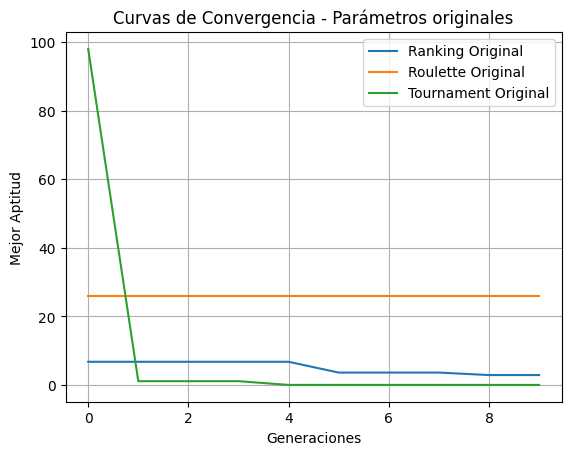

In [49]:
for method, params in original_params.items():
    Pm, pop_size, gen = params
    ga = GeneticAlgorithm(population_size=pop_size, mutation_rate=Pm, crossover_rate=0.85, generations=gen, selection_method=method)
    ga.run(-31, 31)
    #ga.print_fitness_history()  
    ga.plot_convergence(f"{method.capitalize()} Original")

plt.title('Curvas de Convergencia - Parámetros originales')
plt.xlabel('Generaciones')
plt.ylabel('Mejor Aptitud')
plt.legend()
plt.grid()
plt.show()

Mejores parámetros encontrados

In [37]:
best_params = {
    'ranking': best_ranking[1],
    'roulette': best_roulette[1],
    'tournament': best_tournament[1]
}

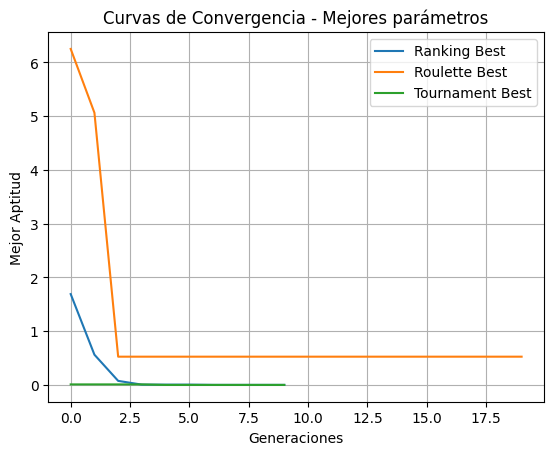

In [50]:
for method, params in best_params.items():
    Pm, pop_size, gen = params
    ga = GeneticAlgorithm(population_size=pop_size, mutation_rate=Pm, crossover_rate=CROSSOVER_RATE, generations=gen, selection_method=method)
    ga.run(-31, 31)
    #ga.print_fitness_history()  
    ga.plot_convergence(f"{method.capitalize()} Best")

plt.title('Curvas de Convergencia - Mejores parámetros')
plt.xlabel('Generaciones')
plt.ylabel('Mejor Aptitud')
plt.legend()
plt.grid()
plt.show()